In [1]:
import numpy as np
from sif.kernels import BrownianMotionKernel
from sif.samplers import multivariate_normal_sampler

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
T = np.atleast_2d(np.linspace(1e-6, 1, num=1000)).T
kernel = BrownianMotionKernel()

In [4]:
n_samples = 10000

In [5]:
C = kernel.cov(T)
m = np.zeros((T.shape[0], ))
B = multivariate_normal_sampler(m, C, n_samples=n_samples)
Theta = B - 2 * T.ravel()

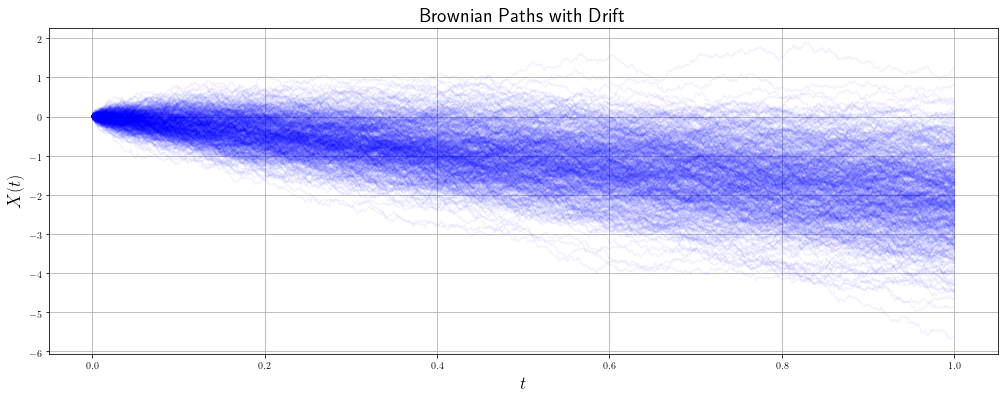

In [6]:
plt.figure(figsize=(17, 6))
for i in range(min(500, n_samples)):
    plt.plot(T.ravel(), Theta[i], "b-", alpha=0.05)
plt.grid()
plt.xlabel("$t$", fontsize=18)
plt.ylabel("$X(t)$", fontsize=18)
plt.title("Brownian Paths with Drift", fontsize=20)
plt.show()

In [7]:
# This, on the other hand, was completely wrong.
# dB = np.hstack((np.zeros((n_samples, 1)), np.diff(B, axis=1)))

dt = T[1] - T[0]
dB = np.hstack((np.diff(B, axis=1), np.zeros((n_samples, 1))))
alpha = -np.cumsum(Theta*dB, axis=1)
beta = -0.5 * np.cumsum((Theta**2) * dt, axis=1)
delta = np.cumsum(Theta * dt, axis=1)
B_tilde = B + delta

In [8]:
Z = np.exp(alpha + beta)

In [9]:
# Z = np.exp(-B - 0.5 * T.ravel())
# B_tilde = B + T.ravel()
# Q = B_tilde * Z

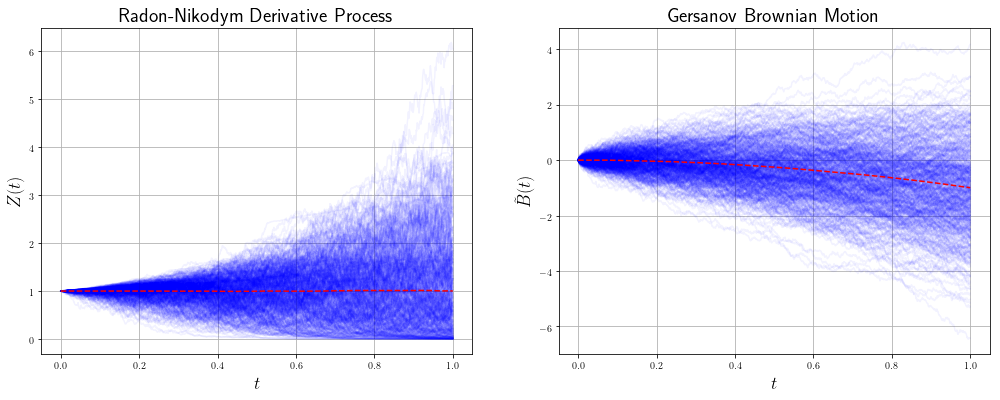

In [10]:
plt.figure(figsize=(17, 6))
plt.subplot(1, 2, 1)
for i in range(min(500, n_samples)):
    plt.plot(T.ravel(), Z[i], "b-", alpha=0.05)
plt.plot(T.ravel(), Z.mean(axis=0), "r--")
plt.grid()
plt.xlabel("$t$", fontsize=18)
plt.ylabel("$Z(t)$", fontsize=18)
plt.title("Radon-Nikodym Derivative Process", fontsize=20)

plt.subplot(1, 2, 2)
for i in range(min(500, n_samples)):
    plt.plot(T.ravel(), B_tilde[i], "b-", alpha=0.05)
plt.plot(T.ravel(), B_tilde.mean(axis=0), "r--")
plt.grid()
plt.xlabel("$t$", fontsize=18)
plt.ylabel("$\\tilde{B}(t)$", fontsize=18)
plt.title("Girsanov Brownian Motion", fontsize=20)

plt.show()

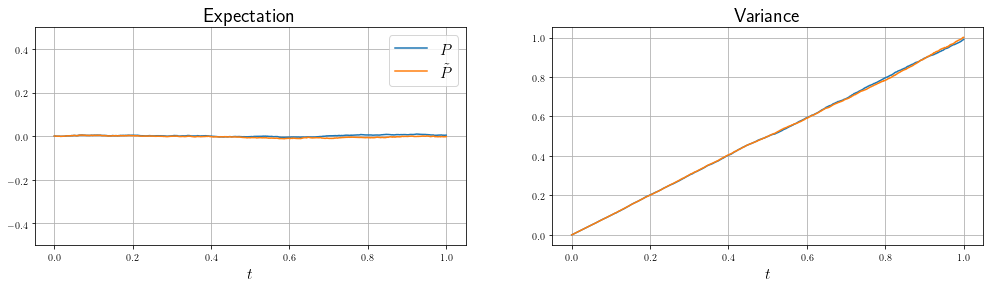

In [11]:
plt.figure(figsize=(17, 4))

plt.subplot(1, 2, 1)
plt.plot(T.ravel(), B.mean(axis=0), label="$P$")
plt.plot(T.ravel(), (B_tilde * Z).mean(axis=0), label="$\\tilde{P}$")
plt.grid()
plt.gca().set_title("Expectation", fontsize=20)

plt.ylim((-0.5, 0.5))
plt.legend(fontsize=16)
plt.xlabel("$t$", fontsize=16)

plt.subplot(1, 2, 2)
plt.plot(T.ravel(), B.var(axis=0))
# This is a very subtle point.
plt.plot(T.ravel(), ((B_tilde**2) * Z).mean(axis=0) - (B_tilde * Z).mean(axis=0)**2)
plt.grid()
plt.xlabel("$t$", fontsize=16)
plt.gca().set_title("Variance", fontsize=20)

plt.show()

In [12]:
np.sum(B*dB, axis=1)

array([-0.23812548,  0.12712264, -0.4167321 , ...,  0.49354384,
       -0.45346362, -0.33248015])

In [13]:
0.5*B[:, -1]**2 - 0.5 * 1

array([-0.23088707,  0.12378656, -0.42530208, ...,  0.48923598,
       -0.45490958, -0.3472521 ])